In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()


In [16]:
df = pd.read_csv("../data/synthetic_coffee_health_10000.csv")
df.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [17]:
print("Formato (linhas, colunas):", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores nulos:")
print(df.isnull().sum())
print("\nDuplicados:")
print(df.duplicated().sum())


Formato (linhas, colunas): (10000, 16)

Tipos de dados:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

Valores nulos:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Ph

In [18]:
df.describe()


,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [19]:
df.describe(include="object")


,Gender,Country,Sleep_Quality,Stress_Level,Health_Issues,Occupation
count,10000,10000,10000,10000,4059,10000
unique,3,20,4,3,3,5
top,Female,Canada,Good,Low,Mild,Office
freq,5001,543,5637,6989,3579,2073


In [20]:
numeric_cols = [
    "Age",
    "Coffee_Intake",
    "Caffeine_mg",
    "Sleep_Hours",
    "BMI",
    "Heart_Rate",
    "Physical_Activity_Hours"
]

numeric_cols


['Age',
 'Coffee_Intake',
 'Caffeine_mg',
 'Sleep_Hours',
 'BMI',
 'Heart_Rate',
 'Physical_Activity_Hours']

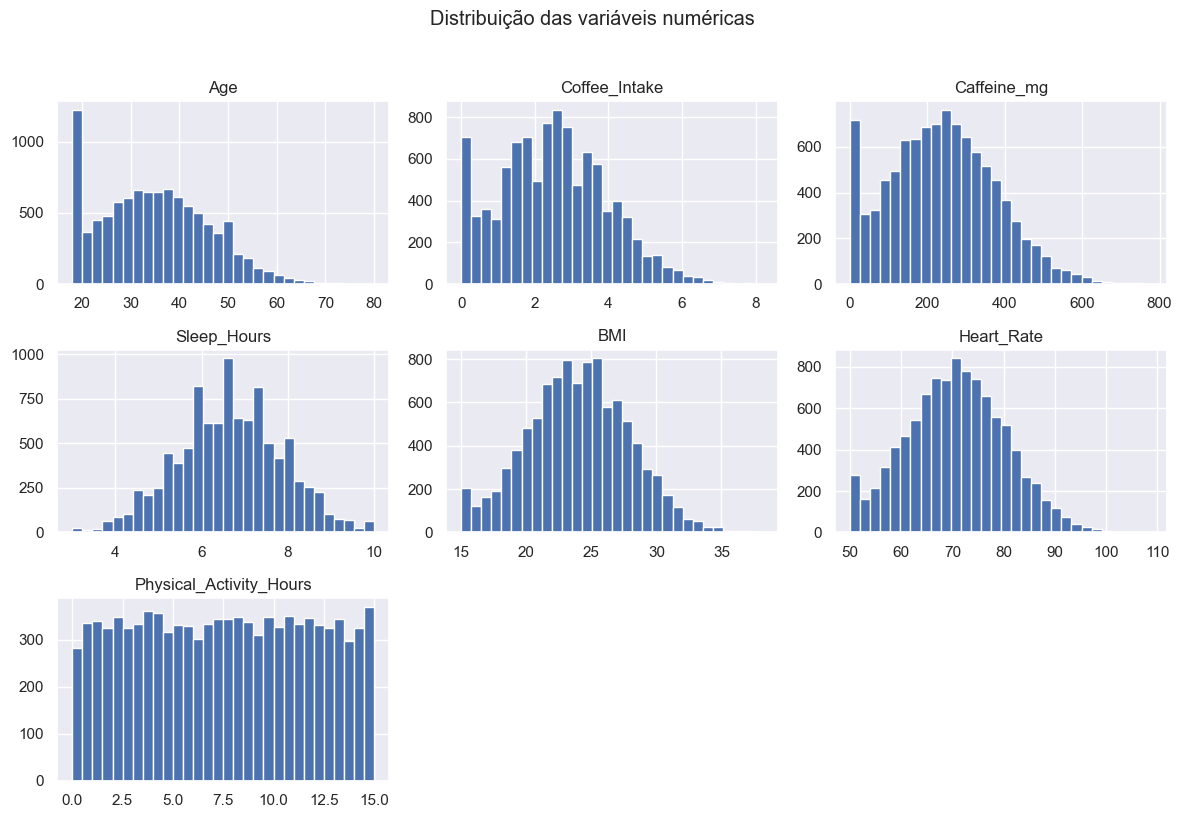

In [21]:
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuição das variáveis numéricas", y=1.02)
plt.tight_layout()
plt.show()


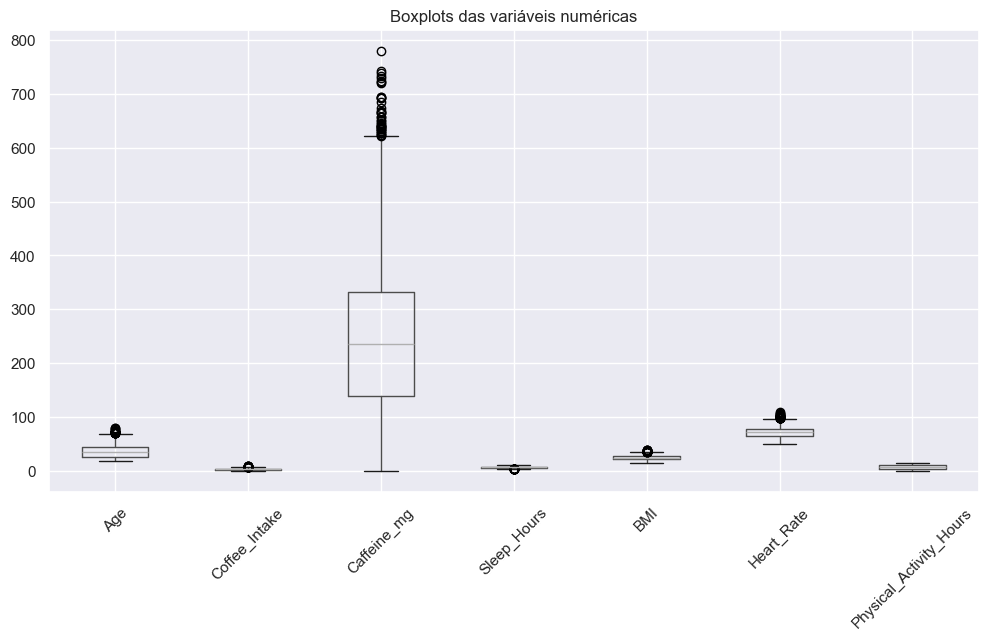

In [22]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplots das variáveis numéricas")
plt.xticks(rotation=45)
plt.show()


In [23]:
cat_cols = [
    "Gender",
    "Country",
    "Sleep_Quality",
    "Stress_Level",
    "Health_Issues",
    "Occupation",
    "Smoking",
    "Alcohol_Consumption"
]

cat_cols


['Gender',
 'Country',
 'Sleep_Quality',
 'Stress_Level',
 'Health_Issues',
 'Occupation',
 'Smoking',
 'Alcohol_Consumption']

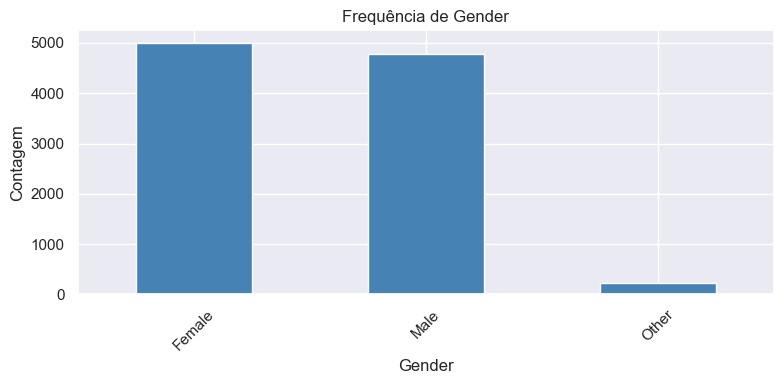

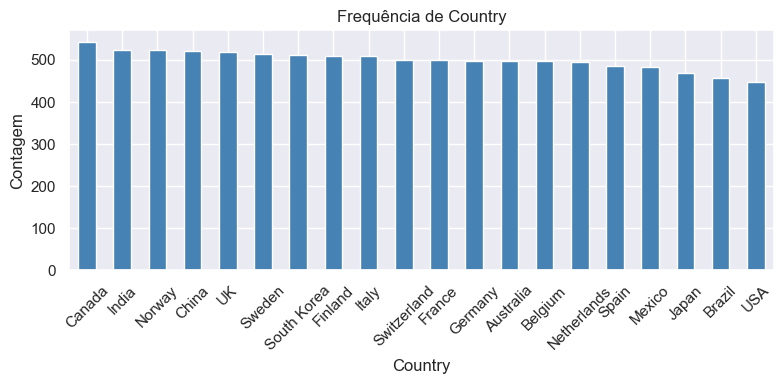

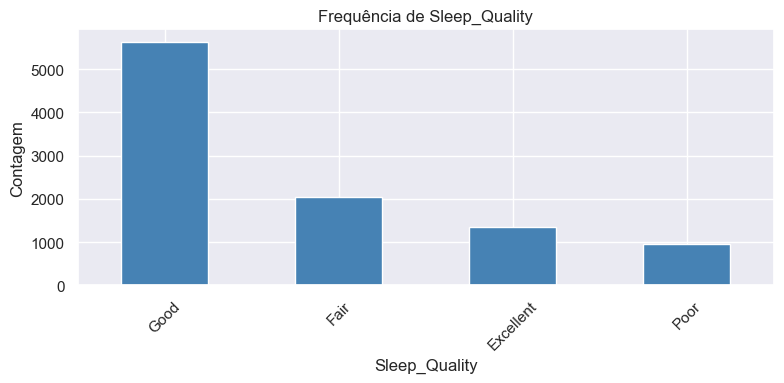

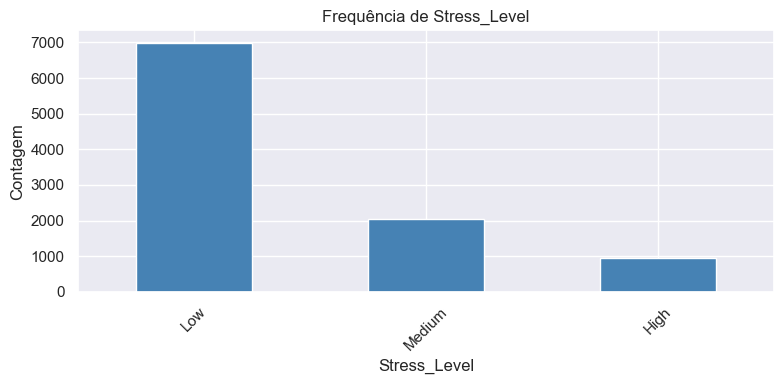

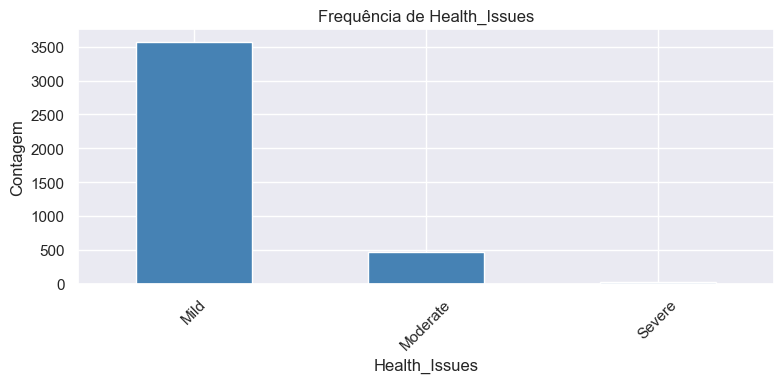

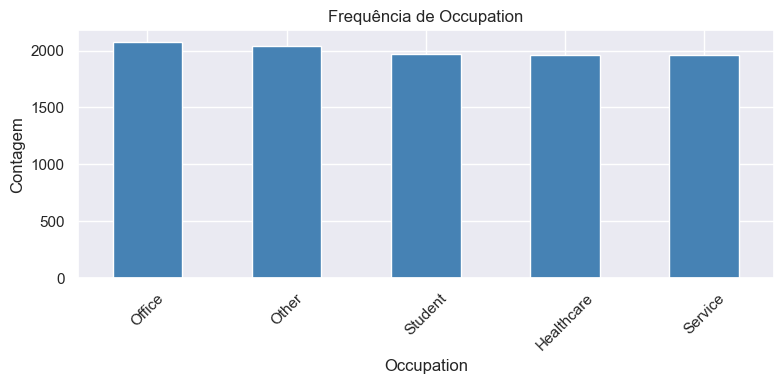

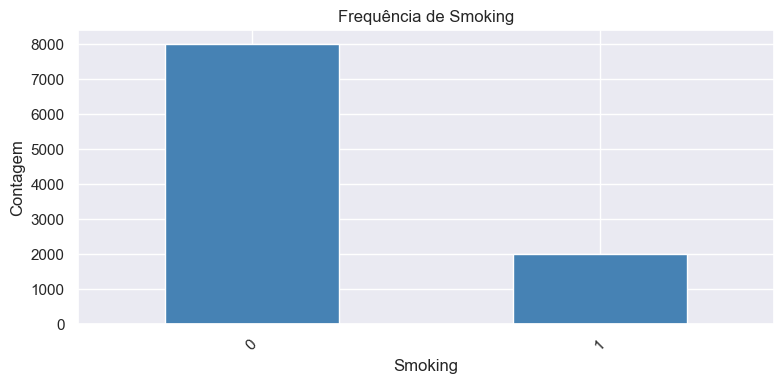

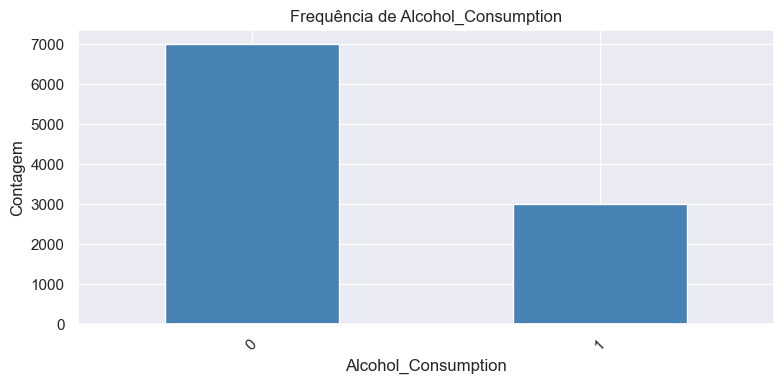

In [24]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind="bar", color="steelblue")
    plt.title(f"Frequência de {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


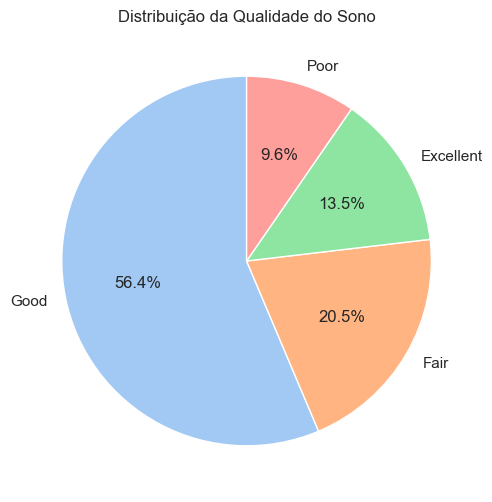

In [25]:
plt.figure(figsize=(6, 6))
df["Sleep_Quality"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel")
)
plt.title("Distribuição da Qualidade do Sono")
plt.ylabel("")
plt.show()


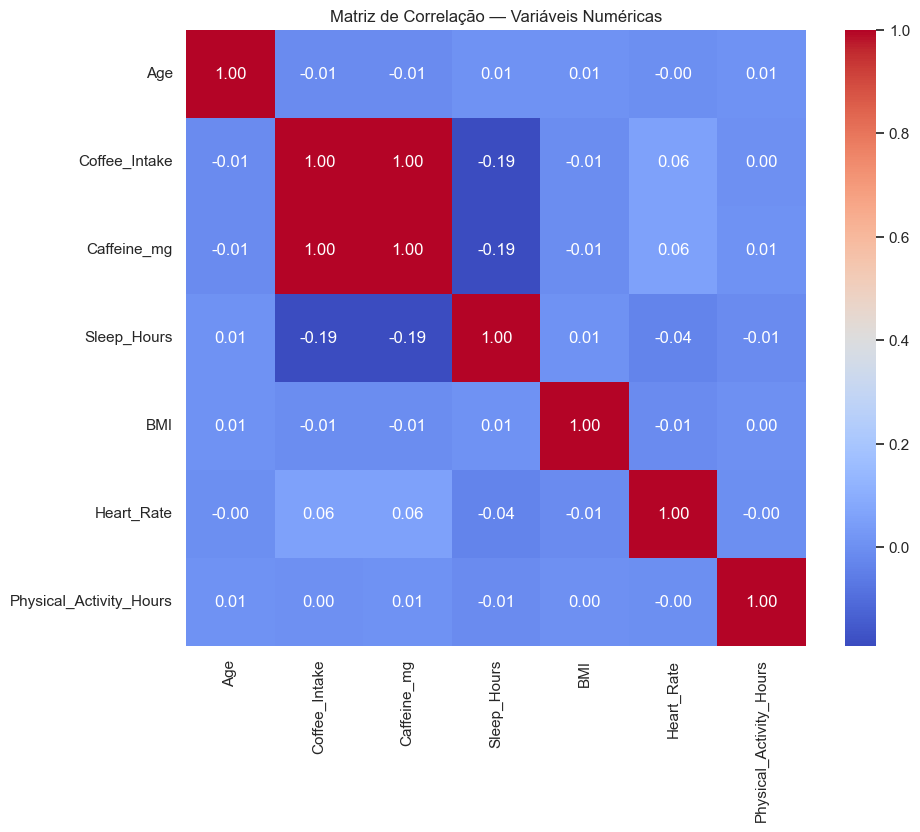

In [26]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação — Variáveis Numéricas")
plt.show()


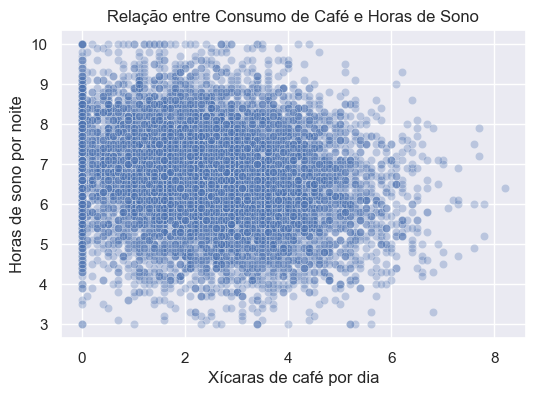

In [27]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Coffee_Intake", y="Sleep_Hours", alpha=0.3)
plt.title("Relação entre Consumo de Café e Horas de Sono")
plt.xlabel("Xícaras de café por dia")
plt.ylabel("Horas de sono por noite")
plt.show()



In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Stress_Level", y="Caffeine_mg",
            order=["Low", "Medium", "High"])
plt.title("Ingestão de Cafeína por Nível de Estresse")
plt.xlabel("Nível de Estresse")
plt.ylabel("Cafeína (mg)")
plt.show()
